In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

In [2]:
# import data
df = pd.read_csv('e-shop clothing 2008.csv', delimiter=";")
df

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

In [4]:
# Eliminate redundant text and change column type to int
df['page 2 (clothing model)'] = df['page 2 (clothing model)'].apply(lambda x:x[1:]).tolist()
df['page 2 (clothing model)'] = df['page 2 (clothing model)'].astype(int)

In [5]:
# filter country using Poland or non-Poland
df['country'] = np.where(df['country'] == 29, 1, 0)
df

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,1,1,1,13,1,5,1,28,2,1
1,2008,4,1,2,1,1,1,16,1,6,1,33,2,1
2,2008,4,1,3,1,1,2,4,10,2,1,52,1,1
3,2008,4,1,4,1,1,2,17,6,6,2,38,2,1
4,2008,4,1,5,1,1,2,8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,1,24024,2,10,2,4,1,67,1,1
165470,2008,8,13,1,0,24025,1,11,3,4,1,62,1,1
165471,2008,8,13,1,0,24026,1,2,3,1,1,43,2,1
165472,2008,8,13,2,0,24026,3,2,12,1,1,43,1,1


In [6]:
# split the dataset to first three months as train data 
train = df[df['month'] < 7]
test = df[df['month'] >= 7]

In [7]:
# prepare dataset
y_train = train['country']
X_train = train.drop(['country', 'year'], axis=1)
y_test = test['country']
X_test = test.drop(['country', 'year'], axis=1)

In [8]:
# feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [10]:
# decision tree
tree = DecisionTreeClassifier(random_state=0)
df_tree = cross_val_score(tree, X_train, y_train, cv=10)

# random forest
forest = RandomForestClassifier(random_state=0)
df_forest = cross_val_score(forest, X_train, y_train,cv=10)

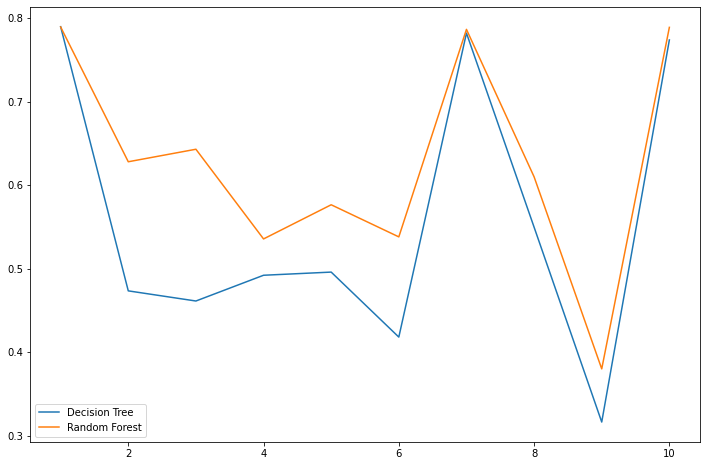

In [11]:
plt.figure(figsize=(12,8))
plt.plot(range(1,11),df_tree,label = "Decision Tree")
plt.plot(range(1,11),df_forest,label = "Random Forest")
plt.legend()
plt.show()

In [12]:
df_tree = cross_val_score(tree, X_train, y_train, cv=10).mean()
df_forest = cross_val_score(forest, X_train, y_train,cv=10).mean()
print("Decision Tree:", df_tree, "\nRandom Forest:", df_forest)

Decision Tree: 0.5552268729695224 
Random Forest: 0.6275891770389024


0.6337738600000637 111
Running time: 587.8126649856567 Seconds


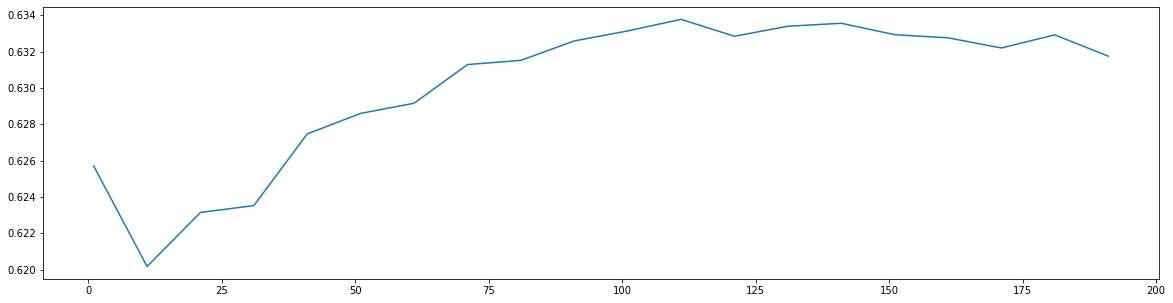

In [15]:
# 1. n_estimators
import time

start=time.time()
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1,random_state=90)
    score = cross_val_score(rfc,X_train,y_train,cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
end=time.time()
print('Running time: %s Seconds'%(end-start))
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

0.6340925752681267 108


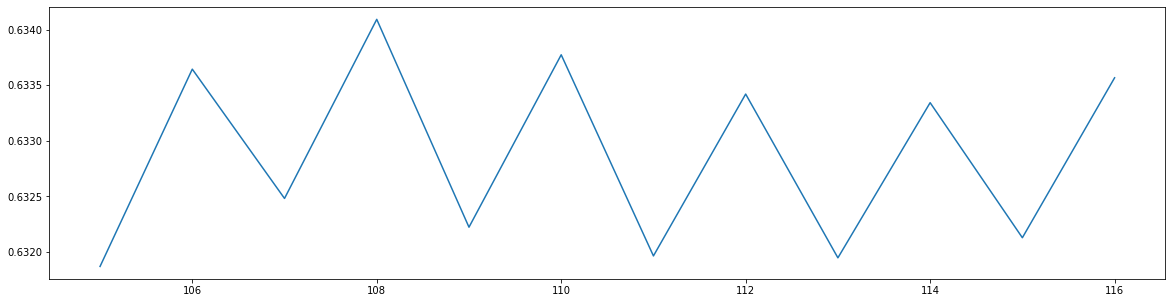

In [18]:
# narrow down n_estimators intervel
scorel = []
for i in range(105,117):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1,random_state=90)
    score = cross_val_score(rfc,X_train,y_train,cv=10).mean()
    scorel.append(score)
print(max(scorel),([*range(105,117)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(105,117),scorel)
plt.show()

In [22]:
# 2. max_depth
start=time.time()
param_grid = {'max_depth':np.arange(1, 20, 2)} 
alg = RandomForestClassifier(n_estimators=108,random_state=1) 
GS = GridSearchCV(alg,param_grid,cv=10) 
GS.fit(X_train,y_train)
print(GS.best_params_)
print(GS.best_score_)
end=time.time()
print('Running time: %s Seconds'%(end-start))

{'max_depth': 1}
0.7894224564697754
Running time: 571.4378633499146 Seconds


In [23]:
# 3. max_features
start=time.time()
param_grid = {'max_features':np.arange(2,12,2)}
rfc = RandomForestClassifier(n_estimators=108,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(X_train,y_train)
print(GS.best_params_)
print(GS.best_score_)
end=time.time()
print('Running time: %s Seconds'%(end-start))

{'max_features': 2}
0.6451696443602483
Running time: 949.1873216629028 Seconds


In [24]:
# 4. min_samples_leaf
start=time.time()
param_grid={'min_samples_leaf':np.arange(1, 1+100, 2)}
rfc = RandomForestClassifier(n_estimators=108,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(X_train,y_train)
print(GS.best_params_)
print(GS.best_score_)
end=time.time()
print('Running time: %s Seconds'%(end-start))

{'min_samples_leaf': 99}
0.7645031450768579
Running time: 3870.828996181488 Seconds


In [25]:
# 5. min_samples_split
start=time.time()
param_grid={'min_samples_split':np.arange(2, 2+20, 2)}
rfc = RandomForestClassifier(n_estimators=108,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(X_train,y_train)
print(GS.best_params_)
print(GS.best_score_)
end=time.time()
print('Running time: %s Seconds'%(end-start))

{'min_samples_split': 20}
0.6492609575762783
Running time: 1002.7277052402496 Seconds


In [26]:
# 6. criterion
start=time.time()
param_grid = {'criterion':['gini', 'entropy']}
rfc = RandomForestClassifier(n_estimators=108,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(X_train,y_train)
print(GS.best_params_)
print(GS.best_score_)
end=time.time()
print('Running time: %s Seconds'%(end-start))

{'criterion': 'entropy'}
0.6349625743310475
Running time: 252.60659313201904 Seconds


In [27]:
model = RandomForestClassifier(n_estimators=108,
                             max_depth=1,
                             max_features=2,
                             min_samples_leaf=99,
                             min_samples_split=20,
                             criterion='entropy',
                             random_state=90)
score = cross_val_score(model,X_train, y_train,cv=10).mean()
print(score)

0.7894224564697754


In [28]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8569432349784322